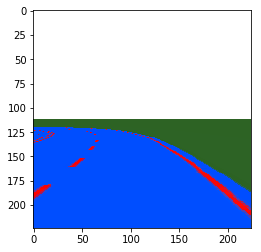

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class_colors = [
        ([240, 20, 20]), #lane lines
        ([0, 78, 255]), #road
        ([45, 99, 36]), #ground
        ([250, 250, 250]), #sky
    ]

filename = 'data/image_00000000_b.png'

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [4]:
def prepare_mask(img, class_colors, thresh):
    mask_channels = []
    for col in class_colors:
        lower = np.array(col) - thresh
        upper = np.array(col) + thresh
        mask = cv2.inRange(img, lower, upper)
        mask_channels.append(mask)

    return np.array(mask_channels)

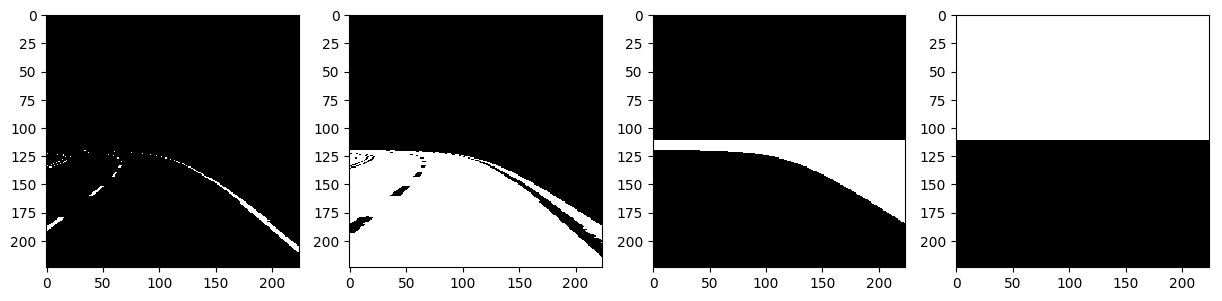

In [5]:
mask = prepare_mask(img, class_colors, thresh=20)

plt.rcdefaults()
fig = plt.figure(figsize=(15,20))

nb_ch = len(class_colors)
n = 1
for channal_mask in mask:
    plt.subplot(nb_ch,4, n)
    plt.imshow(channal_mask,cmap='gray')
    n += 1
plt.show()


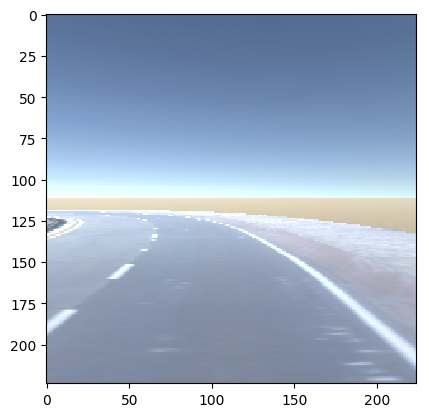

In [15]:
filename = 'data/image_00000000_a.png'

road_img = cv2.imread(filename)
road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2RGB)

plt.imshow(road_img)
plt.show()

In [27]:
def display_three_channels(channels, labels):
    f, subplt = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    for i in range(3):
        subplt[i].imshow(channels[i], cmap='gray')
        subplt[i].set_title(labels[i], fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
def thresh_mask(img, thresh, val=0.1):
    flt_img = np.zeros_like(img, dtype=float)
    flt_img[(img > thresh[0]) & (img <= thresh[1])] = val
    return flt_img

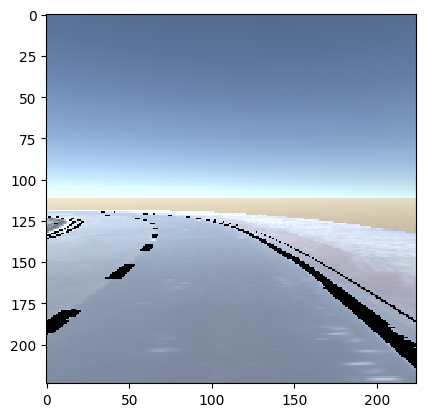

In [21]:
not_lane_lines = np.copy(road_img)
other_masks = mask[1] + mask[2] + mask[3] #not lane lines
not_lane_lines[(other_masks == 0)] = 0
plt.imshow(not_lane_lines)
plt.show()

(224, 224, 3)


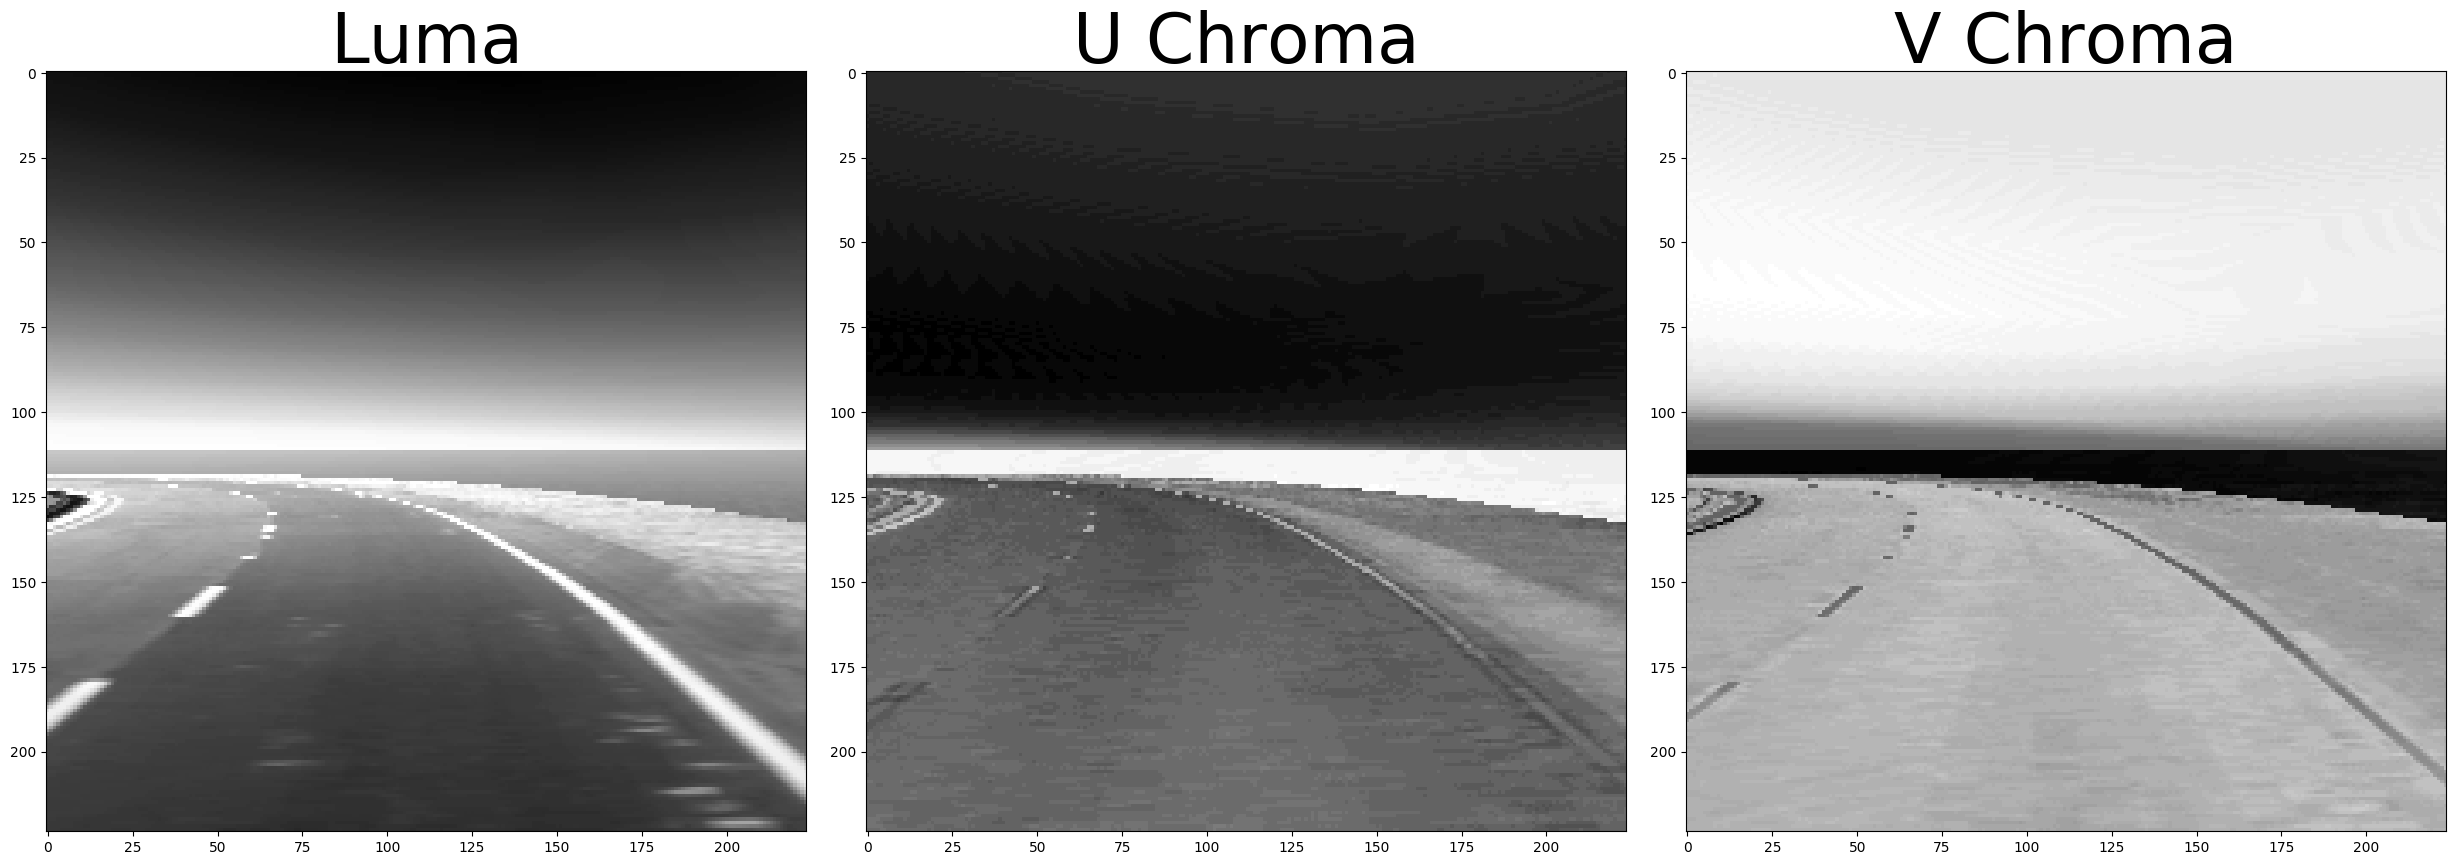

In [29]:
yuv = cv2.cvtColor(road_img, cv2.COLOR_RGB2YUV)
print(yuv.shape)
Y, U, V = cv2.split(yuv)

channel_labels = ("Luma", "U Chroma", "V Chroma")

display_three_channels((Y, U, V), channel_labels)

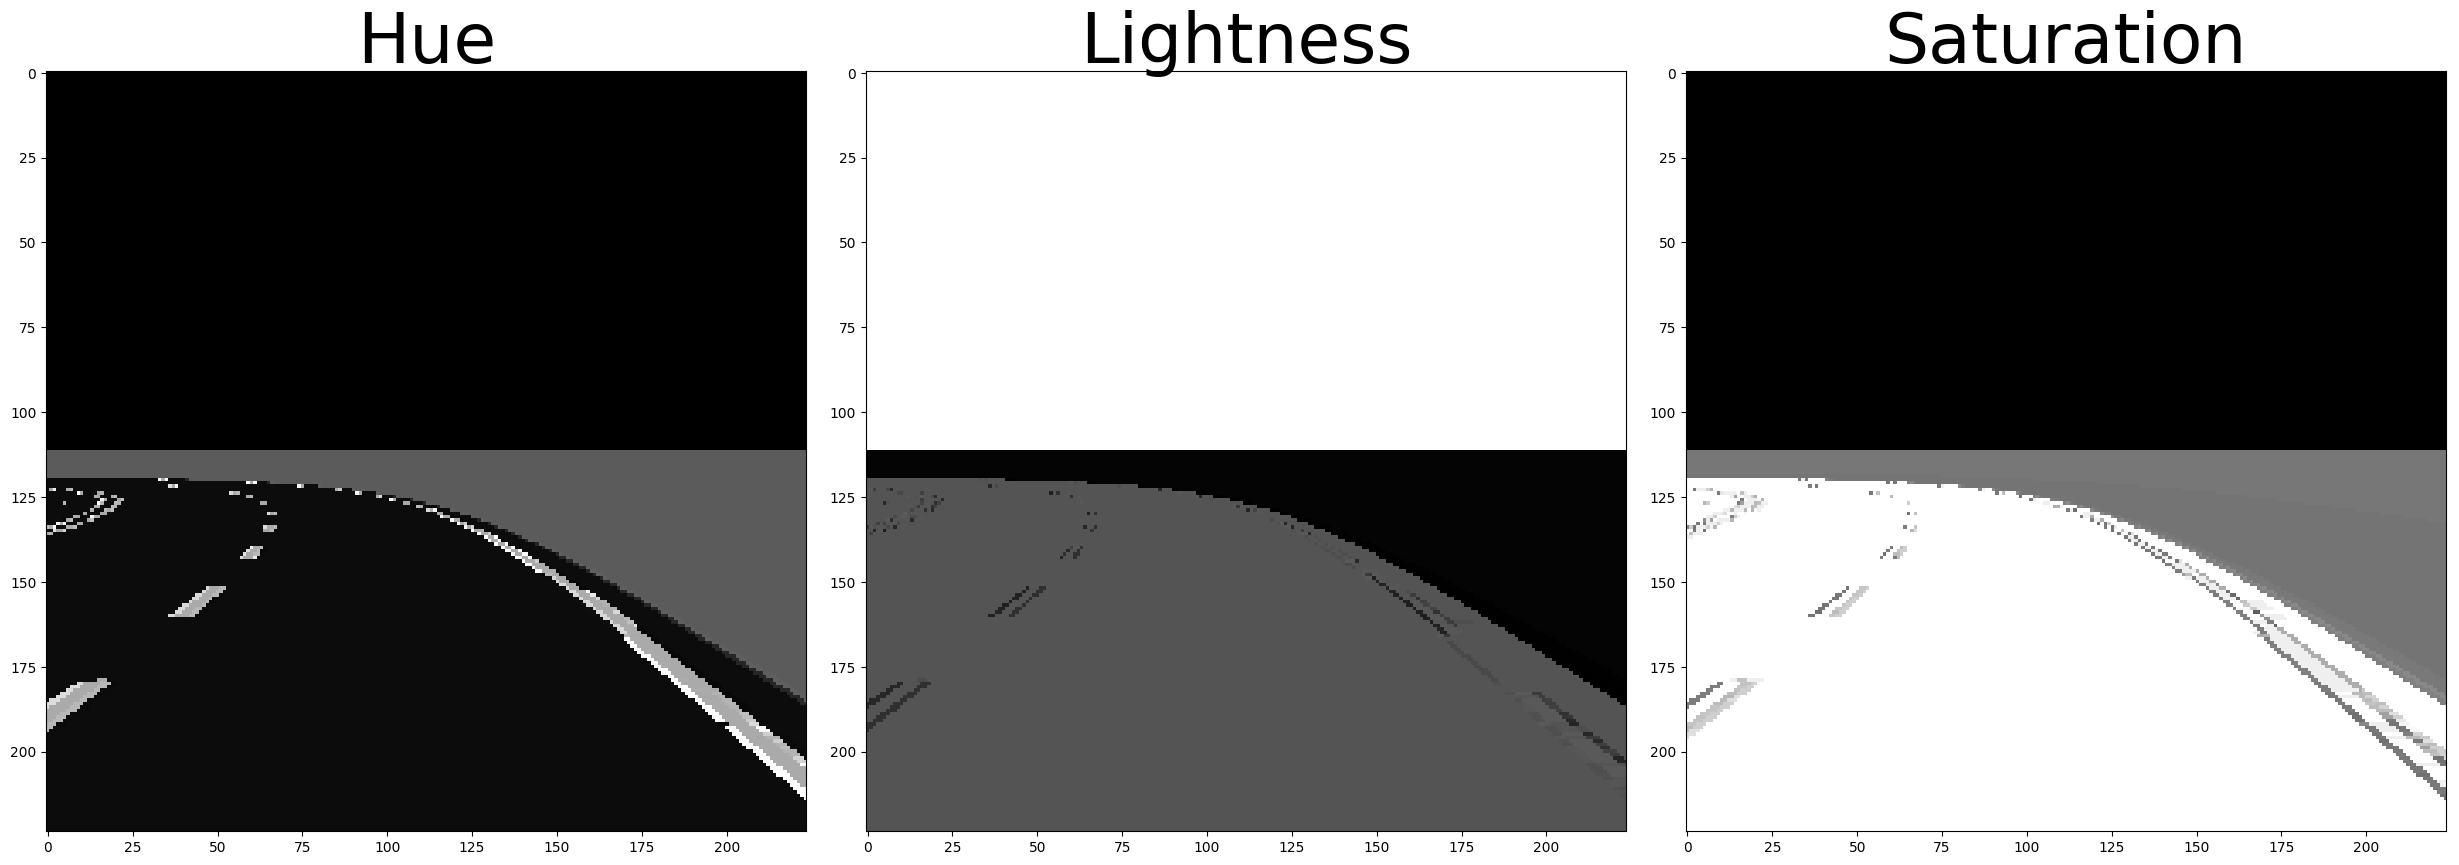

In [30]:
hls = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
H, L, S = cv2.split(hls)

channel_labels = ("Hue", "Lightness", "Saturation")

display_three_channels((H, L, S), channel_labels)